In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_train = pd.read_csv('D:/ESCRITORIO/Github/Road to data science II/Dataset/aug_train.csv')
df_train.shape

(19158, 14)

In [4]:
df_test = pd.read_csv('D:/ESCRITORIO/Github/Road to data science II/Dataset/aug_test.csv')
df_test.shape

(2129, 13)

The test dataset has a column less respect to the train dataset

In [5]:
df_train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [6]:
df_test.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


The test dataset doesn't has the target column, so this dataset is only for predicting purposes. The model training and testing will be done using the df_train dataset.

In [7]:
df = df_train
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There are many null values for some columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

The enrolle_id columns doesn't provide any information and is related with other features or target

In [9]:
df1 = df.drop('enrollee_id', axis='columns')
df1.head(2)
#df1.shape

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [10]:
df1.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [11]:
df1.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

There are more than 4000 nan values for gender. One possible approach is to fill the nan values with "other", because that should be the case when is not declared explicitly. Another approach is to fiil the nan with male gender because is the most probable case based on the frequency. It will be selected the first option.

In [12]:
df1.gender = df1.gender.fillna('Other')
df1.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [13]:
df1.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [14]:
df1.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

For the enrolled_university case, it will be assumed that if there is a nan, it's a no_enrollment case.

In [15]:
df1.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [16]:
df2 = df1
df2.enrolled_university = df2.enrolled_university.fillna('no_enrollment')
df2.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [17]:
df2.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [18]:
df2.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

For the education_level case, it will be assumed that if there is a nan, it's a Graduate person case.

In [19]:
df3 = df2
df3.education_level = df3.education_level.fillna('Graduate')
df3.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [20]:
df3.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [21]:
df3.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

For the major_discipline case, it will be assumed that if there is a nan, it's a STEM disciple case.

In [22]:
df4 = df3
df4.major_discipline = df4.major_discipline.fillna('STEM')
df4.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [23]:
df4.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [24]:
df4.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

For this case, it will be dropped this nan values because they are very few cases only and it should not be justified that this persons have >20 years of experience.

In [25]:
df5 = df4[df4.experience.isna() == False]
df5.isna().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5915
company_type              6104
last_new_job               399
training_hours               0
target                       0
dtype: int64

In [26]:
df5.shape

(19093, 13)

In [27]:
df5.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [28]:
df5.company_size.value_counts()

50-99        3078
100-500      2563
10000+       2011
10/49        1466
1000-4999    1323
<10          1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64

For the company_size case, it will be assumed that if there is a nan, it's a 50-99 company size case.

In [29]:
df6 = df5
df6.company_size = df6.company_size.fillna('50-99')
df6.isna().sum()

C:\Users\RAMOS\AppData\Local\Temp\ipykernel_24148\3724333465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.company_size = df6.company_size.fillna('50-99')


city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size                 0
company_type              6104
last_new_job               399
training_hours               0
target                       0
dtype: int64

In [30]:
df6.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [31]:
df6.company_type.value_counts()

Pvt Ltd                9796
Funded Startup          999
Public Sector           953
Early Stage Startup     601
NGO                     519
Other                   121
Name: company_type, dtype: int64

For the company_type case, it will be assumed that if there is a nan, it's a Pvt Ltd company type case.

In [32]:
df7 = df6
df7.company_type = df7.company_type.fillna('Pvt Ltd')
df7.isna().sum()

C:\Users\RAMOS\AppData\Local\Temp\ipykernel_24148\3808485823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.company_type = df7.company_type.fillna('Pvt Ltd')


city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job              399
training_hours              0
target                      0
dtype: int64

In [33]:
df7.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [34]:
df7.last_new_job.value_counts()

1        8019
>4       3283
2        2897
never    2444
4        1028
3        1023
Name: last_new_job, dtype: int64

For the last_new_job case, it will be assumed that if there is a nan, there is no issue in dropping these few values

In [35]:
df8 = df7[df7.last_new_job.isna() == False]
df8.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

At this point, the nan values issue was treated.

In [36]:
def visualize_eda_categorical(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = 9, ncols = 1, figsize = (6, filas * 8))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 18, fontweight = "bold")
        ax[cada].tick_params(labelsize = 10)

There are many different cities, so for sake of visualization it will be drop that column for this moment

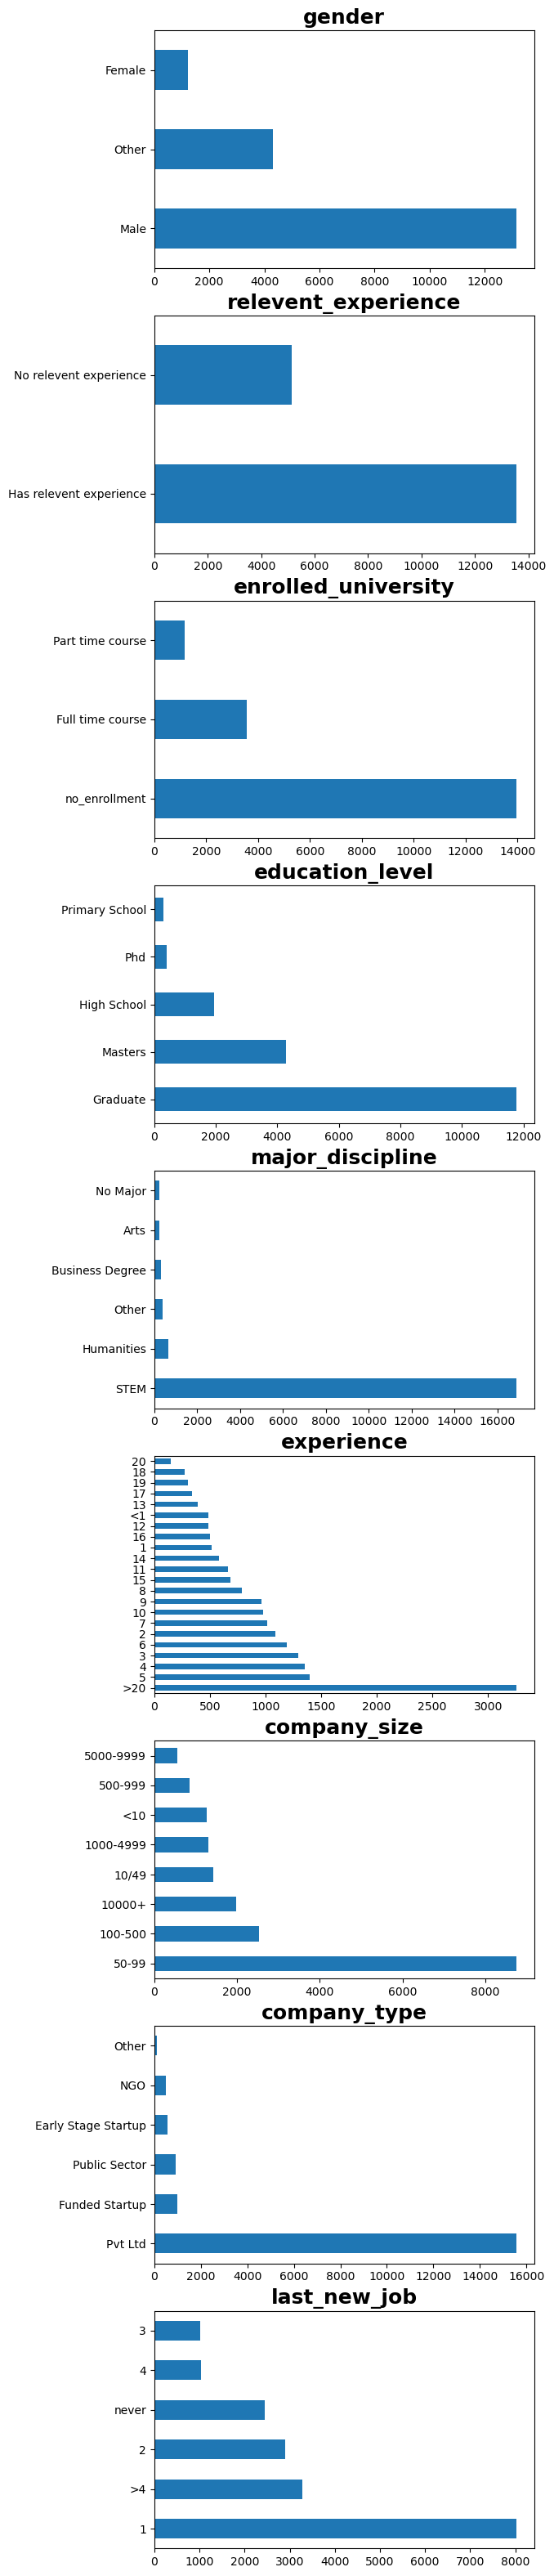

In [37]:
visualize_eda_categorical(df8.select_dtypes('O').drop('city', axis='columns'))

In [38]:
def statistics_cont(num):
    #Calculamos describe
    statistics = num.describe().T
    #Añadimos la mediana
    statistics['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistics)

In [39]:
statistics_cont(df8.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
city_development_index,18694.0,0.830275,0.91,0.122703,0.448,0.743,0.91,0.92,0.949
training_hours,18694.0,65.471488,47.00,60.100561,1.000,23.000,47.00,88.00,336.000
target,18694.0,0.246443,0.00,0.430951,0.000,0.000,0.00,0.00,1.000


It seems that the training_hours feature has a high deviation. It should be further explored.

In [40]:
df8.training_hours.unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15, 142,  28, 228,  29,  12,  17,  35,   4,
       136,  27,  74,  86,  75, 332, 182, 172,  33,  34, 150, 140, 160,
         3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164, 290,
       133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,  11,
        41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88, 218,
        62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44, 110,
       262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,   9,
       129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53, 143,
       124, 214, 288, 306,  98, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [41]:
df8.training_hours.value_counts()

28     318
12     281
18     280
22     278
50     276
      ... 
270      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

<Axes: xlabel='training_hours'>

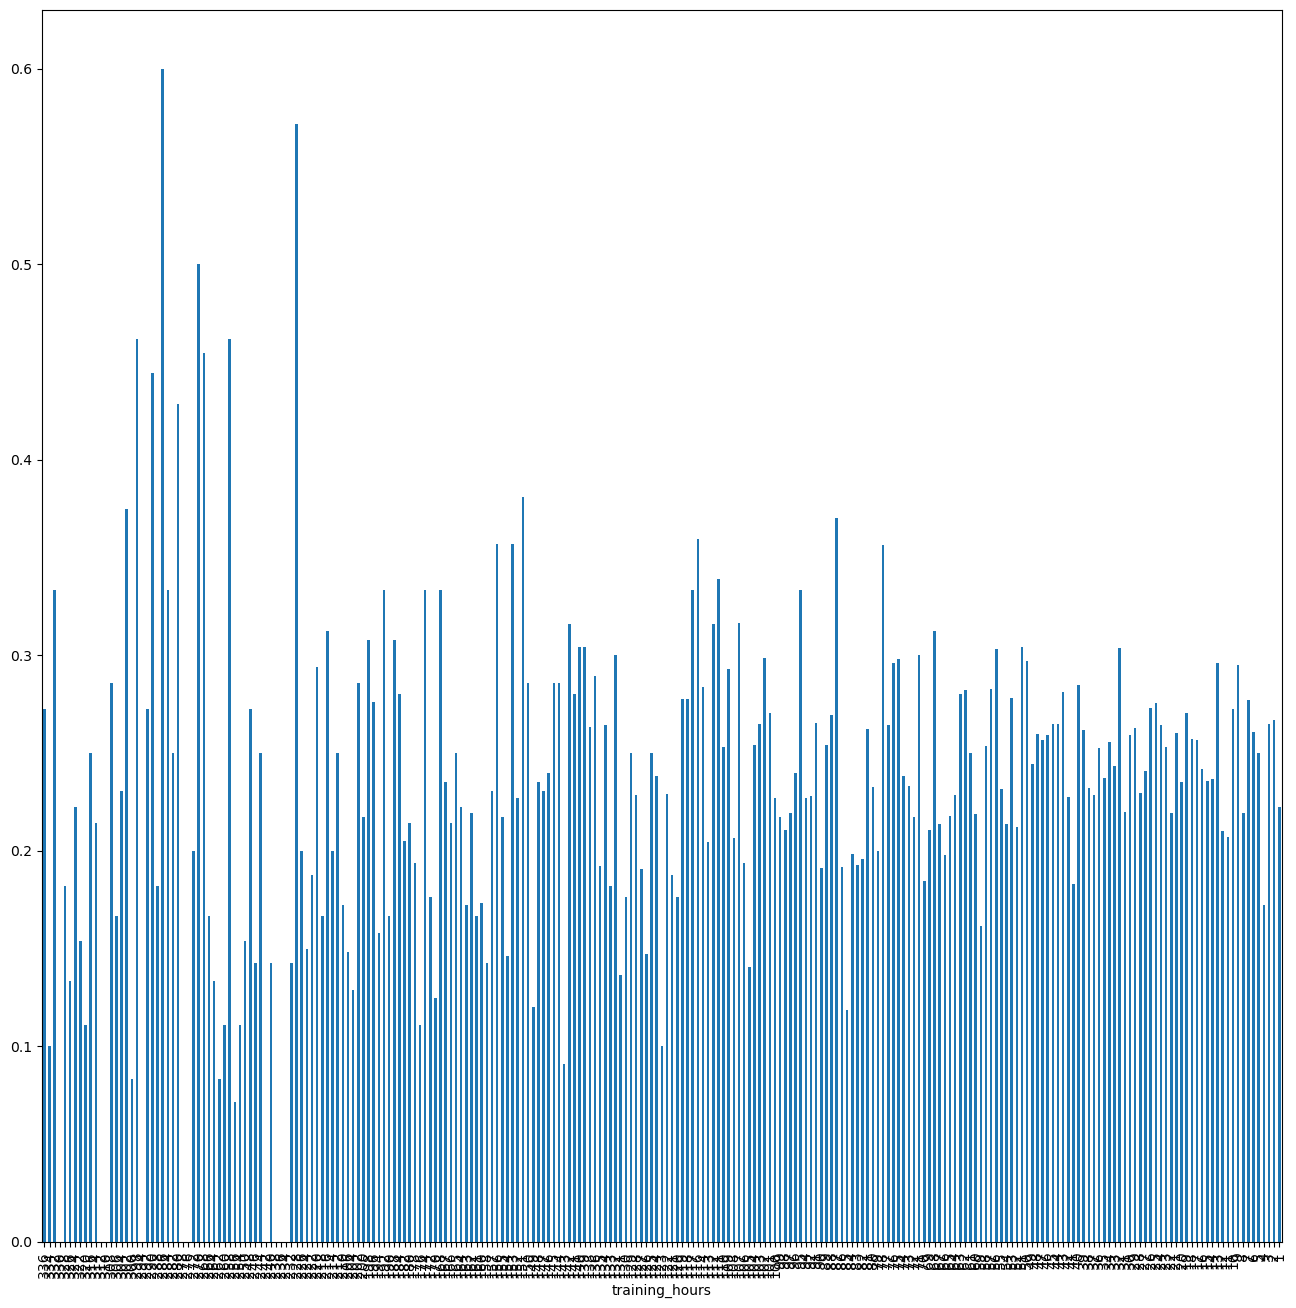

In [42]:
temp = df8.groupby('training_hours').target.mean().sort_index(ascending = False) 
temp.plot.bar(figsize = (16, 16))

In [43]:
df8.groupby('training_hours').target.value_counts().sort_index(ascending = False) 

training_hours  target
336             1.0        3
                0.0        8
334             1.0        1
                0.0        9
332             1.0        4
                          ..
3               0.0       86
2               1.0       24
                0.0       66
1               1.0        2
                0.0        7
Name: target, Length: 472, dtype: int64

<Axes: xlabel='training_hours,target'>

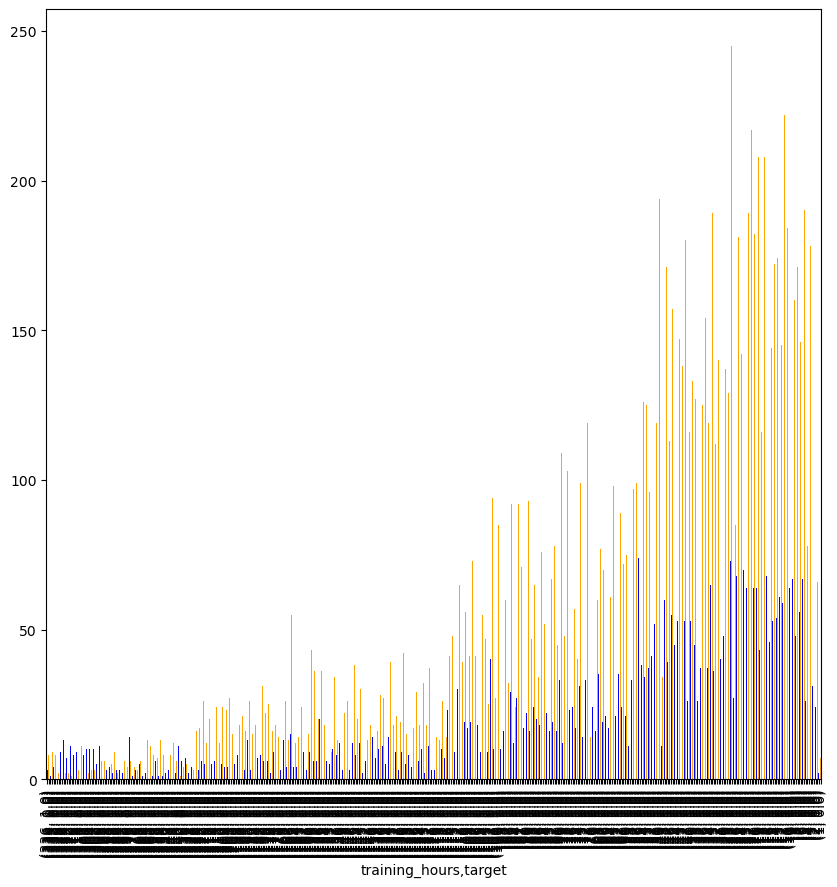

In [44]:
df8.groupby('training_hours').target.value_counts().sort_index(ascending = False).plot.bar(figsize=(10,10),color=['blue','orange'])

there are fewer persons that had practiced so much hours. Thats why there is a significant deviation. It won't be taken any action since there are no strange data that suggests that some cleaning is mandatory needed.

It seems that there is any anomaly with the data

In [45]:
df8.target.value_counts()

0.0    14087
1.0     4607
Name: target, dtype: int64

However, there is an imbalance problem as there are more 0 values than 1 values for the target label

OVERSAMPLING

In [46]:
df_0 = df8[df8.target == 0]
df_1 = df8[df8.target == 1]
df_0.shape, df_1.shape

((14087, 13), (4607, 13))

In [47]:
df_1 = df_1.sample(df_0.shape[0], replace=True)
print(df_0.shape)
df9 = pd.concat([df_0,df_1], axis=0)
df9.target.value_counts()

(14087, 13)


0.0    14087
1.0    14087
Name: target, dtype: int64

In [48]:
df9.shape

(28174, 13)

In [49]:
df9.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
9,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


Oversampling was carried out to solve the imbalance problem.

In [50]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28174 entries, 1 to 7652
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    28174 non-null  object 
 1   city_development_index  28174 non-null  float64
 2   gender                  28174 non-null  object 
 3   relevent_experience     28174 non-null  object 
 4   enrolled_university     28174 non-null  object 
 5   education_level         28174 non-null  object 
 6   major_discipline        28174 non-null  object 
 7   experience              28174 non-null  object 
 8   company_size            28174 non-null  object 
 9   company_type            28174 non-null  object 
 10  last_new_job            28174 non-null  object 
 11  training_hours          28174 non-null  int64  
 12  target                  28174 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.0+ MB


NOW IT IS THE MOMENT TO TRANSFORM THE OBJECT COLUMNS INTO NUMERICAL IN ORDER TO FIT A MACHINE LEARNING MODEL.

In [51]:
len(df9.city.unique())

122

In [52]:
df9.city.value_counts()

city_103    6160
city_21     5706
city_16     1853
city_114    1555
city_160    1250
            ... 
city_82        4
city_8         4
city_129       3
city_111       3
city_140       1
Name: city, Length: 122, dtype: int64

In [53]:
ohe = pd.get_dummies(df9.city)
#ohe.head()

df10 = pd.concat([df9,ohe], axis='columns')
df10.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,...,city_84,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,...,0,0,0,0,0,0,0,0,0,0
2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,...,0,0,0,0,0,0,0,0,0,0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,...,0,0,0,0,0,0,0,0,0,0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,...,0,0,0,0,0,0,0,0,0,0
9,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,...,0,0,0,0,0,0,0,0,0,0


The city column can be dropped now. Also, in order to avoid dummy trap variable, one column of the new columns related to the cities must be dropped.

In [54]:
df11 = df10.drop(['city','city_84'], axis='columns')
df11.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,city_83,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,...,0,0,0,0,0,0,0,0,0,0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11.gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [56]:
dictionary_gender = {'Male':0, 'Other':1, 'Female':2}

In [57]:
df12 = df11
df12.gender = df12.gender.map(dictionary_gender)

In [58]:
df12.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,city_83,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0.776,0,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,...,0,0,0,0,0,0,0,0,0,0
4,0.767,0,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12.gender.unique()

array([0, 1, 2], dtype=int64)

In [60]:
df12.relevent_experience.unique()

array(['No relevent experience', 'Has relevent experience'], dtype=object)

In [61]:
df13 = df12
df13.relevent_experience = df12.relevent_experience.apply(lambda x: 0 if x == 'No relevent experience' else 1)

In [62]:
df13.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,city_83,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0.776,0,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,0,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,...,0,0,0,0,0,0,0,0,0,0
4,0.767,0,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df13.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [64]:
dictionary_enrolled_university = {'no_enrollment':0, 'Full time course':1, 'Part time course':2}

In [65]:
df14 = df13
df14.enrolled_university = df13.enrolled_university.map(dictionary_enrolled_university)

In [66]:
df14.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,city_83,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0.776,0,0,0,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,0,1,Graduate,STEM,5,50-99,Pvt Ltd,never,...,0,0,0,0,0,0,0,0,0,0
4,0.767,0,1,0,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df14.enrolled_university.unique()

array([0, 1, 2], dtype=int64)

In [68]:
df14.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [69]:
dictionary_education_level = {'Graduate':0, 'Masters':1, 'High School':2, 'Phd':3, 'Primary School':4}

In [70]:
df15 = df14
df15.education_level = df14.education_level.map(dictionary_education_level)

In [71]:
df15.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,city_83,city_89,city_9,city_90,city_91,city_93,city_94,city_97,city_98,city_99
1,0.776,0,0,0,0,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,0,1,0,STEM,5,50-99,Pvt Ltd,never,...,0,0,0,0,0,0,0,0,0,0
4,0.767,0,1,0,1,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df15.education_level.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [73]:
df15.major_discipline.unique()

array(['STEM', 'Humanities', 'Arts', 'Business Degree', 'No Major',
       'Other'], dtype=object)

In [74]:
dictionary_major_discipline = {'STEM':0, 'Humanities':1, 'Arts':2, 'Business Degree':3, 'No Major':4, 'Other':5}

In [75]:
df16 = df15
df16.major_discipline = df15.major_discipline.map(dictionary_major_discipline)

In [76]:
df16.major_discipline.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [77]:
df16.experience.unique()

array(['15', '5', '>20', '17', '2', '16', '1', '11', '10', '<1', '4',
       '19', '12', '3', '9', '6', '13', '14', '8', '7', '20', '18'],
      dtype=object)

In [78]:
ohe = pd.get_dummies(df16.experience)

In [79]:
df17 = pd.concat([df16,ohe], axis='columns')
df17.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,20,3,4,5,6,7,8,9,<1,>20
1,0.776,0,0,0,0,0,15,50-99,Pvt Ltd,>4,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,0,1,0,0,5,50-99,Pvt Ltd,never,...,0,0,0,1,0,0,0,0,0,0
4,0.767,0,1,0,1,0,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,0,0,0,1


In [80]:
df18 = df17.drop(['experience','<1'], axis='columns')
df18.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,...,2,20,3,4,5,6,7,8,9,>20
1,0.776,0,0,0,0,0,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,0,0,0,0
2,0.624,1,0,1,0,0,50-99,Pvt Ltd,never,83,...,0,0,0,0,1,0,0,0,0,0
4,0.767,0,1,0,1,0,50-99,Funded Startup,4,8,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df18.company_size.unique()

array(['50-99', '10000+', '5000-9999', '1000-4999', '10/49', '100-500',
       '<10', '500-999'], dtype=object)

In [82]:
ohe = pd.get_dummies(df18.company_size)

In [83]:
df19 = pd.concat([df18,ohe], axis='columns')
df19.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,training_hours,...,9,>20,10/49,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10
1,0.776,0,0,0,0,0,50-99,Pvt Ltd,>4,47,...,0,0,0,0,0,0,1,0,0,0
2,0.624,1,0,1,0,0,50-99,Pvt Ltd,never,83,...,0,0,0,0,0,0,1,0,0,0
4,0.767,0,1,0,1,0,50-99,Funded Startup,4,8,...,0,1,0,0,0,0,1,0,0,0


In [84]:
df20 = df19.drop(['company_size','10000+'], axis='columns')
df20.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,...,8,9,>20,10/49,100-500,1000-4999,50-99,500-999,5000-9999,<10
1,0.776,0,0,0,0,0,Pvt Ltd,>4,47,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.624,1,0,1,0,0,Pvt Ltd,never,83,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.767,0,1,0,1,0,Funded Startup,4,8,0.0,...,0,0,1,0,0,0,1,0,0,0


In [85]:
df20.company_type.unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [86]:
ohe = pd.get_dummies(df20.company_type)

In [87]:
df21 = pd.concat([df20,ohe], axis='columns')
df21.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,...,50-99,500-999,5000-9999,<10,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
1,0.776,0,0,0,0,0,Pvt Ltd,>4,47,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0.624,1,0,1,0,0,Pvt Ltd,never,83,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0.767,0,1,0,1,0,Funded Startup,4,8,0.0,...,1,0,0,0,0,1,0,0,0,0


In [88]:
df22 = df21.drop(['company_type','NGO'], axis='columns')
df22.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,last_new_job,training_hours,target,city_1,...,1000-4999,50-99,500-999,5000-9999,<10,Early Stage Startup,Funded Startup,Other,Public Sector,Pvt Ltd
1,0.776,0,0,0,0,0,>4,47,0.0,0,...,0,1,0,0,0,0,0,0,0,1
2,0.624,1,0,1,0,0,never,83,0.0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.767,0,1,0,1,0,4,8,0.0,0,...,0,1,0,0,0,0,1,0,0,0


In [89]:
df22.last_new_job.unique()

array(['>4', 'never', '4', '1', '3', '2'], dtype=object)

In [90]:
ohe = pd.get_dummies(df22.last_new_job)

In [91]:
df23 = pd.concat([df22,ohe], axis='columns')
df23.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,last_new_job,training_hours,target,city_1,...,Funded Startup,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,0.776,0,0,0,0,0,>4,47,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.624,1,0,1,0,0,never,83,0.0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.767,0,1,0,1,0,4,8,0.0,0,...,1,0,0,0,0,0,0,1,0,0


In [92]:
df24 = df23.drop(['last_new_job','>4'], axis='columns')
df24.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,training_hours,target,city_1,city_10,...,Early Stage Startup,Funded Startup,Other,Public Sector,Pvt Ltd,1,2,3,4,never
1,0.776,0,0,0,0,0,47,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.624,1,0,1,0,0,83,0.0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.767,0,1,0,1,0,8,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0


The dataframe is ready to train a model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [94]:
X = df24.drop('target', axis='columns')
y = df24.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

In [95]:
X.shape

(28174, 166)

In [96]:
y.shape

(28174,)

In [97]:
X_train.shape

(22539, 166)

In [98]:
X_test.shape

(5635, 166)

In [99]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#scaler.fit_transform(X_train)

In [100]:
logistic_reg_model = LogisticRegression(C=1)

In [101]:
logistic_reg_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

In [102]:
logistic_reg_model.score(X_train_scaled,y_train)

0.7450197435556147

In [103]:
logistic_reg_model.score(X_test_scaled,y_test)

0.7416149068322981

Let's apply k-fold cross validation in order to avoid the randomness when spliting the train and test set. Also, with GridSearchCV, it is possible to do hyperparameter tunning to the model and get a high accurate model.

In [139]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LogisticRegression(),{
    'C':[1,5,10],
    'solver' : ['lbfgs', 'liblinear']},
    cv = 5)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10], 'solver': ['lbfgs', 'liblinear']})

In [140]:
clf.best_estimator_

LogisticRegression(C=1, solver='liblinear')

In [141]:
clf.best_params_

{'C': 1, 'solver': 'liblinear'}

In [142]:
clf.best_score_

0.7373441372574535

In [143]:
clf.score(X_test_scaled,y_test)

0.7414374445430346

Let's try with Random Forest model

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [134]:
rf_model.score(X_train_scaled, y_train)

0.998580238697369

In [135]:
rf_model.score(X_test_scaled, y_test)

0.9000887311446317

In [129]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[1,5,50,100,150],
    'criterion' : ["gini", "entropy", "log_loss"]},
    cv = 5)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [1, 5, 50, 100, 150]})

In [130]:
clf.best_estimator_

RandomForestClassifier(n_estimators=50)

In [131]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [132]:
clf.best_score_

0.8861084374518272

In [136]:
clf.score(X_test_scaled, y_test)

0.9023957409050577

Significant improvement with random forest classifier model

In [158]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [159]:
dt_model.score(X_train_scaled, y_train)

0.9986689737787835

In [160]:
dt_model.score(X_test_scaled, y_test)

0.7476486246672582

In [156]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [157]:
svm_model.score(X_train_scaled, y_train)

0.7465282399396601

In [158]:
svm_model.score(X_test_scaled, y_test)

0.7444543034605147

A hyperparameter tuning will be done with gridsearch

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

model_params = {
    'svm':{
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
df

best_estimators

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
cm

array([[2111,  683],
       [ 774, 2067]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

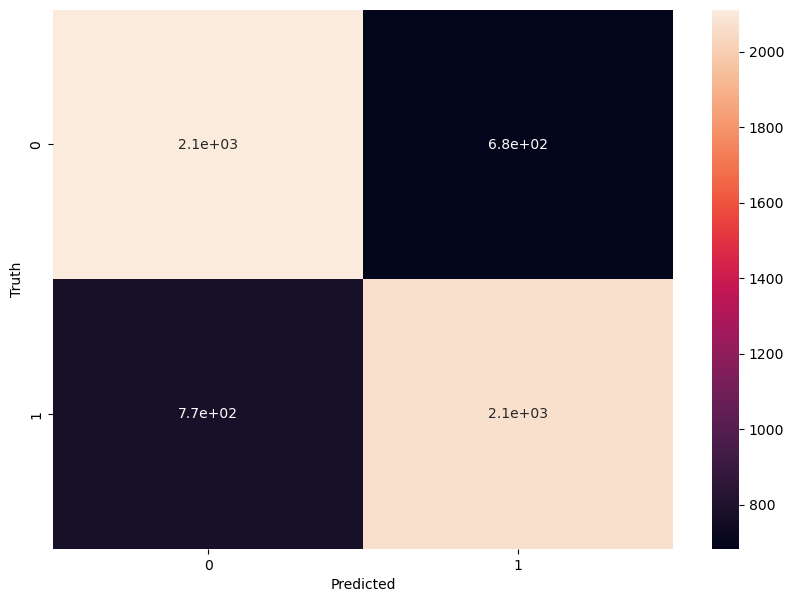

In [150]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Finally, we can predict the test csv file.

In [144]:
df_test = pd.read_csv('D:/ESCRITORIO/Github/Road to data science II/Dataset/aug_test.csv')
df_test.shape

(2129, 13)

In [147]:
def preprocess(df):
    df1 = df.drop('enrollee_id', axis='columns')
    pass
    
    
    
    
    
    
    
    
    
    
    
    